In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib as mpl
import matplotlib.pyplot as plt

import stan
import arviz as az # For visualization and loo
#needed for notebook
import nest_asyncio
nest_asyncio.apply()

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import stan_v3_utility

import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)
az.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [7.0, 5.4]

/tmp/ipykernel_82/1626268779.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  az.style.use('seaborn-darkgrid')


### 1. 
Write down the model for the bioassay data in Stan syntax. For instructions in reporting your implementation, you can refer to parts 2 c) - g) in Assignment 5. More information on the bioassay data can be found in Section 3.7 of the course book and in Chapter 3 reading instructions. To get access to data, use the following code: 

library(aaltobda) 

data("bioassay") 

Use the Gaussian prior as in Assignment 4 and 5, that is [α β ] ∼ N (μ0, Σ0) , where μ0 = [0 10 ] and Σ0 = [22 12 12 102 ] . 

Hint! You will need Stan functions multi_normal and binomial_logit for implementing the prior and observation model, respectively. In Stan code, it is easiest to declare a variable (say theta) which is a two-element vector so that the first value denotes α and latter one β. This is because the multi_normal function that you need for implementing the prior requires a vector as an input.

## Data

In [4]:
df=pd.read_csv('data/bioassay.csv')
df.shape

(4, 3)

In [5]:
df

,x,n,y
0,-0.86,5,0
1,-0.30,5,1
2,-0.05,5,3
3,0.73,5,5


In [6]:
data={k:df[k].tolist() for k in df.columns}
data['N']=df.shape[0]
data['mu']=[0,10]
data['sigma']=[[2**2, 12],
                   [12, 10**2]]
data

{'x': [-0.86, -0.3, -0.05, 0.73],
 'n': [5, 5, 5, 5],
 'y': [0, 1, 3, 5],
 'N': 4,
 'mu': [0, 10],
 'sigma': [[4, 12], [12, 100]]}

## Model

In [7]:
program_code="""
data {
  int<lower=0> N;    // number of data points
  vector[N] x;       // dose
  int<lower=0> n[N]; // number of animals
  int<lower=0> y[N]; // number of deaths

  vector[2] mu;                // prior on mean of theta
  matrix<lower=0>[2, 2] sigma; // prior on covariance matrix of theta 
}

parameters {
  vector[2] mdl_params;
}

transformed parameters {
  vector[N] theta;
  theta = mdl_params[1] + mdl_params[2] * x;
}

model {
  mdl_params ~ multi_normal(mu, sigma);
  y ~ binomial_logit(n, theta);
}
"""

## Build and fit

In [8]:
model=stan.build(program_code=program_code, data=data, random_seed=2324)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 

In file included from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp:2:
/opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(c

Building: 8.4s
Building: 8.5s
Building: 8.6s


/home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp: In instantiation of ‘void model_7k2rjo4a_namespace::model_7k2rjo4a::transform_inits_impl(VecVar&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp:486:26:   required from here
/home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp:310:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  310 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~


Building: 8.7s
Building: 8.8s
Building: 8.9s


In file included from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /opt/conda/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp:2:
/opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_a

Building: 9.0s
Building: 9.1s


/opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]’:
/opt/conda/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::va

Building: 9.2s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s


/home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp: In instantiation of ‘void model_7k2rjo4a_namespace::model_7k2rjo4a::write_array_impl(RNG&, VecR&, VecI&, VecVar&, bool, bool, std::ostream*) const [with RNG = boost::random::additive_combine_engine<boost::random::linear_congruential_engine<unsigned int, 40014, 0, 2147483563>, boost::random::linear_congruential_engine<unsigned int, 40692, 0, 2147483399> >; VecR = Eigen::Matrix<double, -1, 1>; VecI = std::vector<int>; VecVar = Eigen::Matrix<double, -1, 1>; stan::require_vector_like_vt<std::is_floating_point, VecR>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; stan::require_vector_vt<std::is_floating_point, VecVar>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/jovyan/.cache/httpstan/4.9.1/models/7k2rjo4a/model_7k2rjo4a.cpp:418:23:   required from ‘void model_7k2rjo4a_namespace::model_7k2rjo4a::write_array(RNG&, Eigen::Matrix<double, -1, 1>&, Eigen::Matrix<

Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building

Building: 22.9s, done.
Messages from stanc:
Warning in '/tmp/httpstan_o7576rnp/model_7k2rjo4a.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_o7576rnp/model_7k2rjo4a.stan', line 6, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [9]:
fit = model.sample()

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


In [10]:
df

,x,n,y
0,-0.86,5,0
1,-0.30,5,1
2,-0.05,5,3
3,0.73,5,5


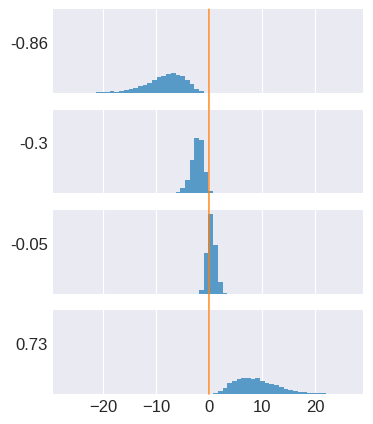

In [11]:
fig, axes = plot_tools.hist_multi_sharex(
    fit['theta'],
    rowlabels=df.x,
    n_bins=60,
    x_lines=0,
    figsize=(4, 5)
)

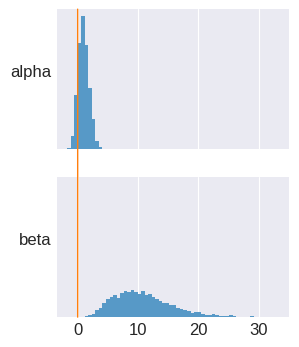

In [12]:
fig, axes = plot_tools.hist_multi_sharex(
    fit['mdl_params'],
    rowlabels=['alpha', 'beta'],
    n_bins=60,
    x_lines=0,
    figsize=(3, 4)
)

Text(0, 0.5, 'beta')

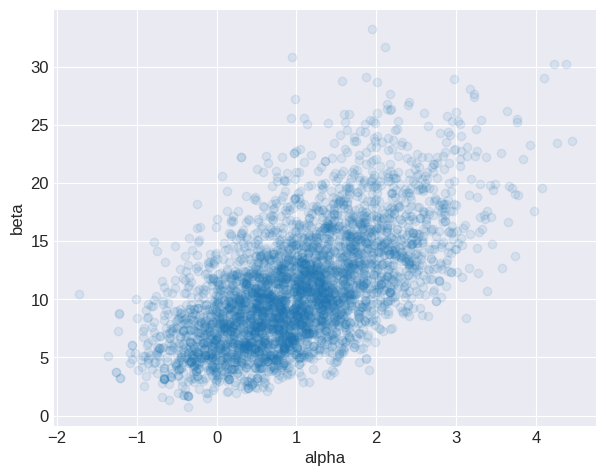

In [13]:
plt.scatter(fit['mdl_params'][0,:],fit['mdl_params'][1,:], alpha=0.1)
plt.xlabel('alpha')
plt.ylabel('beta')

<a list of 6 text.Text objects>

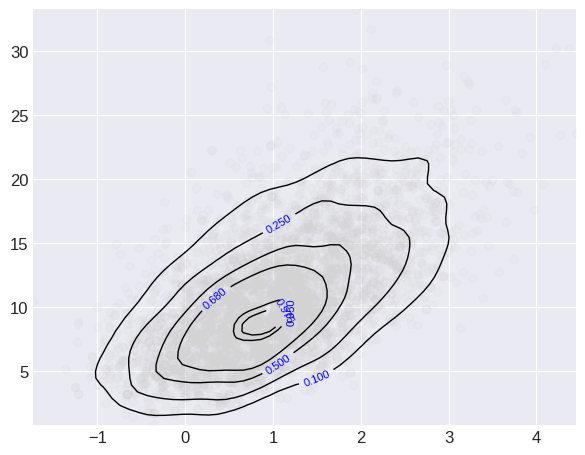

In [14]:
#with ci regions
alpha = fit['mdl_params'][0,:]
beta = fit['mdl_params'][1,:]

k = gaussian_kde(np.vstack([alpha, beta]))
xi, yi = np.mgrid[alpha.min():alpha.max():alpha.size**0.5*1j, beta.min():beta.max():beta.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

#set zi to 0-1 scale
zi = (zi-zi.min())/(zi.max() - zi.min())
zi =zi.reshape(xi.shape)

#set up plot
origin = 'lower'
levels = [0,0.1,0.25,0.5,0.68, 0.95, 0.975,1]

plt.scatter(alpha, beta, alpha=0.1, color='lightgrey')
CS = plt.contour(xi, yi, zi, levels = levels,
              colors=('k',),
              linewidths=(1,),
              origin=origin)

plt.clabel(CS, fmt='%.3f', colors='b', fontsize=8)

### 2. 
Use ̂ R for convergence analysis. You can either use Eq. (11.4) in BDA3 or the later version that can be found in a recent article. You should specify which ̂ R you used. In R the best choice is to use function rhat_basic() or rhat() from the posterior package (see ?posterior::rhat_basic). To check ̂ R and other diagnostics, you can also call fit$summary(), where fit is the fit object returned by Stan’s sampling function. Report the ̂ R values both for α and β and discuss the convergence of the chains. Briefly explain in your own words how to interpret the obtained ̂ R values.

In [15]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mdl_params[0],1.017,0.891,-0.599,2.713,0.024,0.018,1375.0,1792.0,1.0
mdl_params[1],10.876,4.847,2.872,19.932,0.141,0.103,1263.0,1359.0,1.0
theta[0],-8.337,3.696,-15.877,-2.644,0.102,0.075,1448.0,1452.0,1.0
theta[1],-2.246,1.156,-4.398,-0.191,0.026,0.020,2310.0,1724.0,1.0
theta[2],0.473,0.769,-0.948,1.914,0.019,0.013,1709.0,2171.0,1.0
theta[3],8.957,4.140,2.064,16.715,0.124,0.090,1167.0,1315.0,1.0
